#Tackling the Health Crises in Africa

In [1]:
#import all necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 50)
sns.set()

In [2]:
countries = pd.read_csv('/content/drive/MyDrive/Datasets/Hackathon/4. ISO 3166_country-and-continent-codes-list-csv.csv')
countries

,Continent_Name,Continent_Code,Country_Name,Two_Letter_Country_Code,Three_Letter_Country_Code,Country_Number
0,Asia,AS,"Afghanistan, Islamic Republic of",AF,AFG,4.0
1,Europe,EU,"Albania, Republic of",AL,ALB,8.0
2,Antarctica,AN,Antarctica (the territory South of 60 deg S),AQ,ATA,10.0
3,Africa,AF,"Algeria, People's Democratic Republic of",DZ,DZA,12.0
4,Oceania,OC,American Samoa,AS,ASM,16.0
...,...,...,...,...,...,...
249,Africa,AF,"Zambia, Republic of",ZM,ZMB,894.0
250,Oceania,OC,Disputed Territory,XX,XX,NaN
251,Asia,AS,Iraq-Saudi Arabia Neutral Zone,XE,XE,NaN
252,Asia,AS,United Nations Neutral Zone,XD,XD,NaN


In [3]:
afr_countries = countries.query('Continent_Code=="AF"').reset_index()
africa = set(afr_countries['Three_Letter_Country_Code'].values)

In [4]:
africa_countries = list(africa)
africa_countries

['ZAF',
 'GMB',
 'COG',
 'MYT',
 'BWA',
 'REU',
 'ZWE',
 'SEN',
 'MDG',
 'BEN',
 'SHN',
 'TUN',
 'AGO',
 'GAB',
 'ERI',
 'MRT',
 'STP',
 'COM',
 'LSO',
 'DZA',
 'SOM',
 'ZMB',
 'LBY',
 'GIN',
 'CIV',
 'EGY',
 'CAF',
 'GNB',
 'SSD',
 'SLE',
 'MUS',
 'DJI',
 'BDI',
 'NAM',
 'TCD',
 'KEN',
 'UGA',
 'ETH',
 'NER',
 'RWA',
 'MWI',
 'CPV',
 'SWZ',
 'TGO',
 'TZA',
 'ESH',
 'MLI',
 'COD',
 'GHA',
 'CMR',
 'LBR',
 'GNQ',
 'MAR',
 'NGA',
 'MOZ',
 'BFA',
 'SYC',
 'SDN']

In [5]:
len(africa_countries)

58

There are 58 African countries in this dataset.

In [6]:
cause = pd.read_csv('/content/drive/MyDrive/Datasets/Hackathon/1. annual-number-of-deaths-by-cause.csv')
cause

,Entity,Code,Year,Number of executions (Amnesty International),Meningitis,Alzheimer's disease and other dementias,Parkinson's disease,Nutritional deficiencies,Malaria,Drowning,Interpersonal violence,Maternal disorders,HIV/AIDS,Drug use disorders,Tuberculosis,Cardiovascular diseases,Lower respiratory infections,Neonatal disorders,Alcohol use disorders,Self,Exposure to forces of nature,Diarrheal diseases,Environmental heat and cold exposure,Neoplasms,Conflict and terrorism,Diabetes mellitus,Chronic kidney disease,Poisonings,Protein,Terrorism (deaths),Road injuries,Chronic respiratory diseases,Cirrhosis and other chronic liver diseases,Digestive diseases,"Fire, heat, and hot substances",Acute hepatitis
0,Afghanistan,AFG,2007,15,2933.0,1402.0,450.0,2488.0,393.0,2127.0,3657.0,4990.0,148.0,252.0,4995.0,53962.0,27672.0,23890.0,111.0,1310.0,296.0,9320.0,57.0,15925.0,8220.0,3189.0,4490.0,512.0,2439.0,1199.0,7425.0,7222.0,3346.0,6458.0,481.0,3437.0
1,Afghanistan,AFG,2008,17,2731.0,1424.0,455.0,2277.0,255.0,1973.0,3785.0,5020.0,157.0,261.0,4790.0,54051.0,25800.0,23792.0,114.0,1330.0,1317.0,8275.0,57.0,16148.0,6895.0,3261.0,4534.0,495.0,2231.0,1092.0,7355.0,7143.0,3316.0,6408.0,462.0,3005.0
2,Afghanistan,AFG,2009,0,2460.0,1449.0,460.0,2040.0,239.0,1852.0,3874.0,5013.0,167.0,270.0,4579.0,53964.0,24340.0,23672.0,115.0,1342.0,101.0,7359.0,57.0,16383.0,7617.0,3336.0,4597.0,483.0,1998.0,1065.0,7290.0,7045.0,3291.0,6358.0,448.0,2663.0
3,Afghanistan,AFG,2011,2,2327.0,1508.0,473.0,1846.0,390.0,1775.0,4170.0,4857.0,184.0,292.0,4259.0,54347.0,22883.0,23951.0,120.0,1391.0,83.0,6412.0,58.0,17094.0,9142.0,3550.0,4785.0,483.0,1805.0,1525.0,7432.0,6916.0,3318.0,6370.0,448.0,2365.0
4,Afghanistan,AFG,2012,14,2254.0,1544.0,482.0,1705.0,94.0,1716.0,4245.0,4736.0,191.0,305.0,4122.0,54868.0,22162.0,24057.0,124.0,1413.0,333.0,6008.0,103.0,17522.0,11350.0,3682.0,4846.0,482.0,1667.0,3521.0,7494.0,6878.0,3353.0,6398.0,445.0,2264.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7268,Zimbabwe,ZWE,2015,NaN,1439.0,754.0,215.0,3019.0,2518.0,770.0,1302.0,1355.0,29162.0,104.0,11214.0,16649.0,12974.0,9278.0,48.0,2235.0,16.0,5102.0,37.0,11161.0,13.0,3176.0,2108.0,381.0,2990.0,NaN,2373.0,2751.0,1956.0,4202.0,632.0,146.0
7269,Zimbabwe,ZWE,2016,NaN,1457.0,767.0,219.0,3056.0,2050.0,801.0,1342.0,1338.0,27141.0,110.0,10998.0,16937.0,13024.0,9065.0,49.0,2296.0,31.0,5002.0,37.0,11465.0,6.0,3259.0,2160.0,393.0,3027.0,NaN,2436.0,2788.0,1962.0,4264.0,648.0,146.0
7270,Zimbabwe,ZWE,2017,NaN,1460.0,781.0,223.0,2990.0,2116.0,818.0,1363.0,1312.0,24846.0,115.0,10762.0,17187.0,12961.0,8901.0,50.0,2338.0,251.0,4948.0,37.0,11744.0,5.0,3313.0,2196.0,398.0,2962.0,0.0,2473.0,2818.0,2007.0,4342.0,654.0,144.0
7271,Zimbabwe,ZWE,2018,NaN,1450.0,795.0,227.0,2918.0,2088.0,825.0,1396.0,1294.0,22106.0,121.0,10545.0,17460.0,12860.0,8697.0,51.0,2372.0,0.0,4745.0,37.0,12038.0,9.0,3381.0,2240.0,400.0,2890.0,NaN,2509.0,2849.0,2030.0,4377.0,657.0,139.0


In [7]:
africa_cause = cause[cause['Code'].isin(africa_countries)]
africa_cause.head()

,Entity,Code,Year,Number of executions (Amnesty International),Meningitis,Alzheimer's disease and other dementias,Parkinson's disease,Nutritional deficiencies,Malaria,Drowning,Interpersonal violence,Maternal disorders,HIV/AIDS,Drug use disorders,Tuberculosis,Cardiovascular diseases,Lower respiratory infections,Neonatal disorders,Alcohol use disorders,Self,Exposure to forces of nature,Diarrheal diseases,Environmental heat and cold exposure,Neoplasms,Conflict and terrorism,Diabetes mellitus,Chronic kidney disease,Poisonings,Protein,Terrorism (deaths),Road injuries,Chronic respiratory diseases,Cirrhosis and other chronic liver diseases,Digestive diseases,"Fire, heat, and hot substances",Acute hepatitis
90,Algeria,DZA,1990,NaN,838.0,1337.0,439.0,453.0,9.0,1207.0,491.0,1634.0,44.0,171.0,939.0,53488.0,8125.0,17931.0,75.0,1405.0,0.0,2908.0,35.0,10571.0,4.0,1743.0,3559.0,485.0,422.0,3.0,13438.0,4410.0,2401.0,3981.0,1113.0,486.0
91,Algeria,DZA,1991,NaN,794.0,1411.0,451.0,439.0,9.0,1136.0,484.0,1541.0,50.0,179.0,884.0,54722.0,7701.0,17421.0,76.0,1388.0,0.0,2598.0,34.0,10917.0,76.0,1787.0,3640.0,469.0,408.0,42.0,13120.0,4481.0,2456.0,4033.0,1078.0,478.0
92,Algeria,DZA,1992,NaN,763.0,1494.0,470.0,427.0,12.0,1111.0,497.0,1482.0,57.0,192.0,853.0,56107.0,7409.0,16918.0,78.0,1406.0,21.0,2363.0,34.0,11145.0,510.0,1813.0,3687.0,464.0,396.0,236.0,13115.0,4571.0,2500.0,4083.0,1071.0,472.0
93,Algeria,DZA,1993,NaN,736.0,1582.0,488.0,417.0,12.0,1092.0,513.0,1422.0,64.0,205.0,828.0,57522.0,7162.0,16442.0,80.0,1428.0,37.0,2160.0,34.0,11386.0,826.0,1840.0,3741.0,461.0,386.0,NaN,13154.0,4668.0,2542.0,4136.0,1067.0,470.0
94,Algeria,DZA,1994,NaN,708.0,1675.0,509.0,402.0,8.0,1086.0,553.0,1356.0,72.0,223.0,802.0,59055.0,6905.0,15878.0,82.0,1474.0,211.0,1994.0,34.0,11629.0,2428.0,1873.0,3806.0,460.0,370.0,500.0,13326.0,4773.0,2588.0,4193.0,1095.0,469.0


In [8]:
africa_cause.isna().sum()

Entity                                             0
Code                                               0
Year                                               0
Number of executions (Amnesty International)    1558
Meningitis                                         2
Alzheimer's disease and other dementias            2
Parkinson's disease                                2
Nutritional deficiencies                           2
Malaria                                            2
Drowning                                           2
Interpersonal violence                             2
Maternal disorders                                 2
HIV/AIDS                                           2
Drug use disorders                                 2
Tuberculosis                                       2
Cardiovascular diseases                            2
Lower respiratory infections                       2
Neonatal disorders                                 2
Alcohol use disorders                         

In [9]:
africa_cause = africa_cause.fillna(0)

In [10]:
africa_cause.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1622 entries, 90 to 7272
Data columns (total 36 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Entity                                        1622 non-null   object 
 1   Code                                          1622 non-null   object 
 2   Year                                          1622 non-null   int64  
 3   Number of executions (Amnesty International)  1622 non-null   object 
 4   Meningitis                                    1622 non-null   float64
 5   Alzheimer's disease and other dementias       1622 non-null   float64
 6   Parkinson's disease                           1622 non-null   float64
 7   Nutritional deficiencies                      1622 non-null   float64
 8   Malaria                                       1622 non-null   float64
 9   Drowning                                      1622 non-null   

In [11]:
africa_cause['Number of executions (Amnesty International)'] = africa_cause['Number of executions (Amnesty International)'].replace({'>1':0, '0':0})

In [12]:
causes = ['Number of executions (Amnesty International)', 'Meningitis', 
          'Alzheimer\'s disease and other dementias', 'Parkinson\'s disease', 
          'Nutritional deficiencies', 'Malaria', 'Drowning', 'Interpersonal violence', 
          'Maternal disorders', 'HIV/AIDS', 'Drug use disorders',
          'Tuberculosis', 'Cardiovascular diseases', 'Lower respiratory infections', 'Neonatal disorders',
          'Alcohol use disorders', 'Self', 
          'Exposure to forces of nature', 'Diarrheal diseases', 
          'Environmental heat and cold exposure', 'Neoplasms', 
          'Conflict and terrorism', 'Diabetes mellitus',
          'Chronic kidney disease', 'Poisonings', 'Protein', 
          'Terrorism (deaths)', 'Road injuries', 'Chronic respiratory diseases',
          'Cirrhosis and other chronic liver diseases', 'Digestive diseases', 
          'Fire, heat, and hot substances', 'Acute hepatitis']

In [13]:
africa_cause['Number of executions (Amnesty International)'] = africa_cause['Number of executions (Amnesty International)'].astype(float)

In [14]:

sum_list =[]
for i in causes:
  sums = africa_cause[i].sum()
  sum_list.append(sums)
sum_list
  

[416.0,
 5559524.0,
 1639240.0,
 423819.0,
 5322341.0,
 21686212.0,
 945168.0,
 2178241.0,
 2980844.0,
 29106954.0,
 75300.0,
 13777906.0,
 36704129.0,
 25228891.0,
 25075868.0,
 176803.0,
 1893828.0,
 34979.0,
 26224284.0,
 165419.0,
 13633300.0,
 1575614.0,
 4240423.0,
 3630433.0,
 613866.0,
 5145423.0,
 90040.0,
 6359228.0,
 5707725.0,
 6347520.0,
 9900878.0,
 803932.0,
 696217.0]

In [15]:
death_causes = list(zip(causes, sum_list))
death_causes

[('Number of executions (Amnesty International)', 416.0),
 ('Meningitis', 5559524.0),
 ("Alzheimer's disease and other dementias", 1639240.0),
 ("Parkinson's disease", 423819.0),
 ('Nutritional deficiencies', 5322341.0),
 ('Malaria', 21686212.0),
 ('Drowning', 945168.0),
 ('Interpersonal violence', 2178241.0),
 ('Maternal disorders', 2980844.0),
 ('HIV/AIDS', 29106954.0),
 ('Drug use disorders', 75300.0),
 ('Tuberculosis', 13777906.0),
 ('Cardiovascular diseases', 36704129.0),
 ('Lower respiratory infections', 25228891.0),
 ('Neonatal disorders', 25075868.0),
 ('Alcohol use disorders', 176803.0),
 ('Self', 1893828.0),
 ('Exposure to forces of nature', 34979.0),
 ('Diarrheal diseases', 26224284.0),
 ('Environmental heat and cold exposure', 165419.0),
 ('Neoplasms', 13633300.0),
 ('Conflict and terrorism', 1575614.0),
 ('Diabetes mellitus', 4240423.0),
 ('Chronic kidney disease', 3630433.0),
 ('Poisonings', 613866.0),
 ('Protein', 5145423.0),
 ('Terrorism (deaths)', 90040.0),
 ('Road inj

In [16]:
prevalent_causes = pd.DataFrame(death_causes, columns=['Cause','Number of deaths'])
prevalent_causes = prevalent_causes.sort_values('Number of deaths', ascending=False)
prevalent_causes

,Cause,Number of deaths
12,Cardiovascular diseases,36704129.0
9,HIV/AIDS,29106954.0
18,Diarrheal diseases,26224284.0
13,Lower respiratory infections,25228891.0
14,Neonatal disorders,25075868.0
5,Malaria,21686212.0
11,Tuberculosis,13777906.0
20,Neoplasms,13633300.0
30,Digestive diseases,9900878.0
27,Road injuries,6359228.0


In [17]:
top_5_causes = prevalent_causes.iloc[0:5]
top_5_causes

,Cause,Number of deaths
12,Cardiovascular diseases,36704129.0
9,HIV/AIDS,29106954.0
18,Diarrheal diseases,26224284.0
13,Lower respiratory infections,25228891.0
14,Neonatal disorders,25075868.0


In [18]:
bottom_5_causes = prevalent_causes.iloc[28:]
bottom_5_causes

,Cause,Number of deaths
19,Environmental heat and cold exposure,165419.0
26,Terrorism (deaths),90040.0
10,Drug use disorders,75300.0
17,Exposure to forces of nature,34979.0
0,Number of executions (Amnesty International),416.0


In [19]:
def add_labels(y):
  '''function to add data labels to each bars on a barplot'''
  for i, v in enumerate(y):
    ax.text(v, i, s=f" {v:.0f}", va='center')

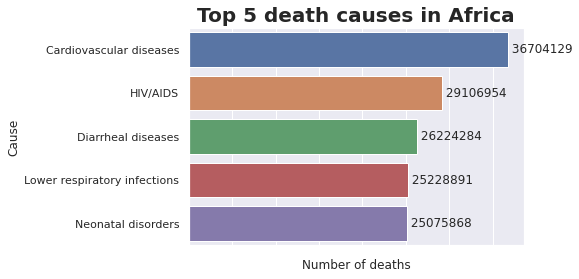

In [20]:
ax = sns.barplot(y=top_5_causes['Cause'], x=top_5_causes['Number of deaths'])
#plt.xlim(0, 40000000)
ax.set_xticklabels([])
add_labels(list(top_5_causes['Number of deaths']))
#for bars in ax.containers:
  #ax.bar_label(bars)
plt.title('Top 5 death causes in Africa', fontsize=20, fontweight='bold')
plt.savefig('top_death_causes.png',bbox_inches='tight', dpi=300)
plt.show()

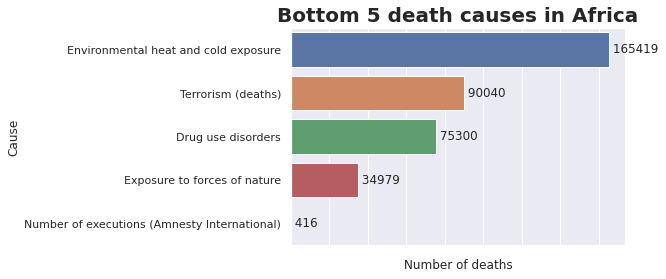

In [21]:
ax = sns.barplot(y=bottom_5_causes['Cause'], x=bottom_5_causes['Number of deaths'])
#plt.xlim(0, 170000)
ax.set_xticklabels([])
add_labels(list(bottom_5_causes['Number of deaths']))
plt.title('Bottom 5 death causes in Africa', fontsize=20, fontweight='bold')
plt.savefig('bottomdeathcauses.png', bbox_inches='tight', dpi=300)
plt.show()

In [22]:
age_group = pd.read_csv('/content/drive/MyDrive/Datasets/Hackathon/2. number-of-deaths-by-age-group.csv')
age_group.head()

,Entity,Code,Year,Deaths 70+ years,Deaths 50-69 years,Deaths Age: 15-49 years,Deaths 5-14 years,Deaths Under 5
0,Afghanistan,AFG,1990,34681,40624,22968,5642,78170
1,Afghanistan,AFG,1991,35271,41414,26523,6433,83035
2,Afghanistan,AFG,1992,35694,41829,30000,6854,93859
3,Afghanistan,AFG,1993,36433,42598,32339,7206,106537
4,Afghanistan,AFG,1994,37460,43923,36817,8106,115334


In [23]:
africa_deaths = age_group[age_group['Code'].isin(africa_countries)]
africa_deaths

,Entity,Code,Year,Deaths 70+ years,Deaths 50-69 years,Deaths Age: 15-49 years,Deaths 5-14 years,Deaths Under 5
90,Algeria,DZA,1990,45295,28519,26069,7856,45891
91,Algeria,DZA,1991,46269,29803,25786,7224,43714
92,Algeria,DZA,1992,47879,30238,26364,7056,41813
93,Algeria,DZA,1993,49385,30771,26955,6899,40063
94,Algeria,DZA,1994,51193,31202,28917,6923,38320
...,...,...,...,...,...,...,...,...
6835,Zimbabwe,ZWE,2015,25573,32963,43441,4506,26551
6836,Zimbabwe,ZWE,2016,25804,33138,42011,4592,25499
6837,Zimbabwe,ZWE,2017,26030,33282,40417,4737,24766
6838,Zimbabwe,ZWE,2018,26279,33316,38536,4430,23905


In [24]:
africa_deaths.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1620 entries, 90 to 6839
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Entity                   1620 non-null   object
 1   Code                     1620 non-null   object
 2   Year                     1620 non-null   int64 
 3   Deaths 70+ years         1620 non-null   int64 
 4   Deaths 50-69 years       1620 non-null   int64 
 5   Deaths Age: 15-49 years  1620 non-null   int64 
 6   Deaths 5-14 years        1620 non-null   int64 
 7   Deaths Under 5           1620 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 113.9+ KB


In [25]:
africa_deaths['Year'].value_counts()

1990    54
1991    54
2018    54
2017    54
2016    54
2015    54
2014    54
2013    54
2012    54
2011    54
2010    54
2009    54
2008    54
2007    54
2006    54
2005    54
2004    54
2003    54
2002    54
2001    54
2000    54
1999    54
1998    54
1997    54
1996    54
1995    54
1994    54
1993    54
1992    54
2019    54
Name: Year, dtype: int64

In [26]:
deaths_by_year = africa_deaths.groupby('Year', as_index=False)[['Deaths 70+ years', 'Deaths 50-69 years', 'Deaths Age: 15-49 years', 'Deaths 5-14 years', 
                                                                'Deaths Under 5']].sum()
deaths_by_year

,Year,Deaths 70+ years,Deaths 50-69 years,Deaths Age: 15-49 years,Deaths 5-14 years,Deaths Under 5
0,1990,1126905,1187574,1187424,275850,4168240
1,1991,1161064,1212862,1230958,270909,4201072
2,1992,1196516,1241323,1306550,271853,4203056
3,1993,1233769,1271967,1394683,276527,4222170
4,1994,1289270,1356588,1777830,353654,4352422
5,1995,1310334,1352020,1601476,285326,4270484
6,1996,1350602,1398404,1729841,296317,4300164
7,1997,1392776,1442440,1855369,301466,4300952
8,1998,1429779,1475620,1964236,305856,4311062
9,1999,1457858,1498882,2078280,314309,4320099


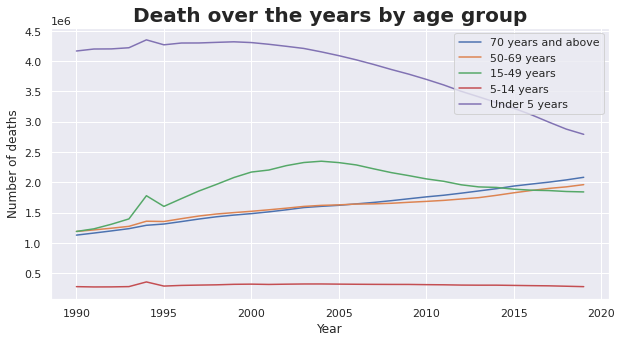

In [27]:
plt.figure(figsize=(10,5))
plt.plot(deaths_by_year['Year'], deaths_by_year['Deaths 70+ years'], label='70 years and above')
plt.plot(deaths_by_year['Year'], deaths_by_year['Deaths 50-69 years'], label='50-69 years')
plt.plot(deaths_by_year['Year'], deaths_by_year['Deaths Age: 15-49 years'], label='15-49 years')
plt.plot(deaths_by_year['Year'], deaths_by_year['Deaths 5-14 years'], label='5-14 years')
plt.plot(deaths_by_year['Year'], deaths_by_year['Deaths Under 5'], label='Under 5 years')
plt.legend(loc='upper right')
plt.xlabel('Year')
plt.ylabel('Number of deaths')
plt.title('Death over the years by age group', fontsize=20, fontweight='bold')
plt.savefig('Age_group_deaths.png', bbox_inches='tight', dpi=300)
plt.show()

In [28]:
death_by_country = africa_deaths.groupby('Entity', as_index=False)[['Deaths 70+ years', 'Deaths 50-69 years', 'Deaths Age: 15-49 years', 'Deaths 5-14 years', 
                                                                'Deaths Under 5']].sum()
death_by_country

,Entity,Deaths 70+ years,Deaths 50-69 years,Deaths Age: 15-49 years,Deaths 5-14 years,Deaths Under 5
0,Algeria,2063726,1059527,863469,136883,856664
1,Angola,615516,919940,1067546,228870,2948402
2,Benin,399969,320919,345644,86415,1296377
3,Botswana,105330,157574,306571,12486,82454
4,Burkina Faso,779915,761582,802116,194708,2979769
5,Burundi,392185,492662,723174,135472,1182998
6,Cameroon,842220,984775,1313026,206164,2329219
7,Cape Verde,39110,14759,15424,1664,15253
8,Central African Republic,182410,393738,552454,71410,820885
9,Chad,539187,475343,512468,148009,2333528


In [29]:
death_by_country = death_by_country.sort_values('Deaths Under 5', ascending=False)
death_by_country

,Entity,Deaths 70+ years,Deaths 50-69 years,Deaths Age: 15-49 years,Deaths 5-14 years,Deaths Under 5
38,Nigeria,7017325,6097834,6667110,1431306,28074561
19,Ethiopia,3275166,3684413,4571409,929873,10497273
13,Democratic Republic of Congo,2665236,3176881,3568112,742978,8933876
48,Tanzania,1903239,1876692,2949621,344750,4937114
51,Uganda,1081433,1266565,2298647,355365,4168780
37,Niger,473200,548009,553461,190710,3796564
35,Mozambique,958575,1225198,1878387,265723,3368558
31,Mali,701404,644723,629967,184692,3177286
47,Sudan,1638842,1067411,1018949,211144,3119934
4,Burkina Faso,779915,761582,802116,194708,2979769


In [30]:
top_death_by_country = death_by_country.iloc[0:5]
top_death_by_country

,Entity,Deaths 70+ years,Deaths 50-69 years,Deaths Age: 15-49 years,Deaths 5-14 years,Deaths Under 5
38,Nigeria,7017325,6097834,6667110,1431306,28074561
19,Ethiopia,3275166,3684413,4571409,929873,10497273
13,Democratic Republic of Congo,2665236,3176881,3568112,742978,8933876
48,Tanzania,1903239,1876692,2949621,344750,4937114
51,Uganda,1081433,1266565,2298647,355365,4168780


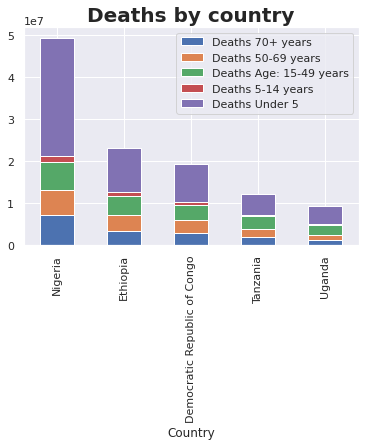

In [31]:
#plt.figure(figsize =(20, 10))
top_death_by_country.plot(x='Entity', kind='bar', stacked=True)
plt.xlabel('Country')
plt.title("Deaths by country", fontsize=20, fontweight='bold')
plt.savefig('country_deaths.png', bbox_inches='tight', dpi=300)
plt.show()

In [32]:
medical_doctors = pd.read_excel('/content/drive/MyDrive/Datasets/Hackathon/3. Medical Doctors Per 10000 population.xlsx', skiprows=2)
medical_doctors

,IndicatorCode,Indicator,ParentLocationCode,ParentLocation,ThreeLocCode,Location,Period,FactValueNumeric,Value
0,HWF_0001,"Medical doctors (per 10,000)",AFR,Africa,AGO,Angola,2018,2.14,2.14
1,HWF_0001,"Medical doctors (per 10,000)",AFR,Africa,AGO,Angola,2017,2.15,2.15
2,HWF_0001,"Medical doctors (per 10,000)",AFR,Africa,AGO,Angola,2009,1.31,1.31
3,HWF_0001,"Medical doctors (per 10,000)",AFR,Africa,AGO,Angola,2004,0.62,0.62
4,HWF_0001,"Medical doctors (per 10,000)",AFR,Africa,AGO,Angola,1997,0.59,0.59
...,...,...,...,...,...,...,...,...,...
11503,HWF_0005,Medical doctors not further defined (number),WPR,Western Pacific,WSM,Samoa,2010,64.00,64
11504,HWF_0005,Medical doctors not further defined (number),WPR,Western Pacific,WSM,Samoa,2008,85.00,85
11505,HWF_0005,Medical doctors not further defined (number),WPR,Western Pacific,WSM,Samoa,2005,50.00,50
11506,HWF_0005,Medical doctors not further defined (number),WPR,Western Pacific,WSM,Samoa,2003,50.00,50


In [33]:
africa_medical_doctors = medical_doctors[medical_doctors['ParentLocationCode']=='AFR']
africa_medical_doctors.head()

,IndicatorCode,Indicator,ParentLocationCode,ParentLocation,ThreeLocCode,Location,Period,FactValueNumeric,Value
0,HWF_0001,"Medical doctors (per 10,000)",AFR,Africa,AGO,Angola,2018,2.14,2.14
1,HWF_0001,"Medical doctors (per 10,000)",AFR,Africa,AGO,Angola,2017,2.15,2.15
2,HWF_0001,"Medical doctors (per 10,000)",AFR,Africa,AGO,Angola,2009,1.31,1.31
3,HWF_0001,"Medical doctors (per 10,000)",AFR,Africa,AGO,Angola,2004,0.62,0.62
4,HWF_0001,"Medical doctors (per 10,000)",AFR,Africa,AGO,Angola,1997,0.59,0.59


In [34]:
africa_medical_doctors['Period'].value_counts()

2018    177
2004    114
2016     83
2009     81
2017     77
2008     76
2010     71
2015     69
2011     66
2013     59
2019     58
2020     57
2012     55
2005     53
2014     52
2007     48
2006     39
2003     27
2002     21
2000     20
2001     12
1998      9
1997      6
1999      6
1995      6
1994      3
1993      3
1991      3
1990      3
1985      2
Name: Period, dtype: int64

In [35]:
africa_medical_doctors = africa_medical_doctors[africa_medical_doctors['Period']>=1990]

In [36]:
africa_medical_doctors.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1354 entries, 0 to 9052
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   IndicatorCode       1354 non-null   object 
 1   Indicator           1354 non-null   object 
 2   ParentLocationCode  1354 non-null   object 
 3   ParentLocation      1354 non-null   object 
 4   ThreeLocCode        1354 non-null   object 
 5   Location            1354 non-null   object 
 6   Period              1354 non-null   int64  
 7   FactValueNumeric    1354 non-null   float64
 8   Value               1354 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 105.8+ KB


In [37]:
africa_medical_doctors['Indicator'].value_counts()

Medical doctors (per 10,000)                    411
Medical doctors (number)                        411
Medical doctors not further defined (number)    325
Specialist medical practitioners (number)       105
Generalist medical practitioners (number)       102
Name: Indicator, dtype: int64

In [38]:
medical_doctors = africa_medical_doctors[africa_medical_doctors['Indicator']=='Medical doctors (number)']

In [39]:
medical_doctors_per_year = medical_doctors.groupby('Period', as_index=False)[['FactValueNumeric']].sum()
medical_doctors_per_year

,Period,FactValueNumeric
0,1990,1320.0
1,1991,189.0
2,1993,225.0
3,1994,277.0
4,1995,1951.0
5,1997,1076.0
6,1998,2735.0
7,1999,739.0
8,2000,4177.0
9,2001,1891.0


In [40]:
medical_doctors_per_10000 = africa_medical_doctors[africa_medical_doctors['IndicatorCode']=='HWF_0001']
medical_doctors_per_10000['Indicator'].value_counts()

Medical doctors (per 10,000)    411
Name: Indicator, dtype: int64

In [41]:
doctors_per_10000_by_country = medical_doctors_per_10000.groupby('Location', as_index=False)[['FactValueNumeric']].mean()
doctors_per_10000_by_country = doctors_per_10000_by_country.sort_values('FactValueNumeric', ascending=False)
doctors_per_10000_by_country

,Location,FactValueNumeric
30,Mauritius,15.204286
0,Algeria,13.764000
38,Seychelles,13.684167
40,South Africa,7.666000
6,Cabo Verde,6.488750
32,Namibia,4.702500
36,Sao Tome and Principe,4.436667
34,Nigeria,3.600000
3,Botswana,3.461765
18,Gabon,3.382222


In [42]:
top_20_doctors_per_10000 = doctors_per_10000_by_country.iloc[0:20]
top_20_doctors_per_10000

,Location,FactValueNumeric
30,Mauritius,15.204286
0,Algeria,13.764000
38,Seychelles,13.684167
40,South Africa,7.666000
6,Cabo Verde,6.488750
32,Namibia,4.702500
36,Sao Tome and Principe,4.436667
34,Nigeria,3.600000
3,Botswana,3.461765
18,Gabon,3.382222


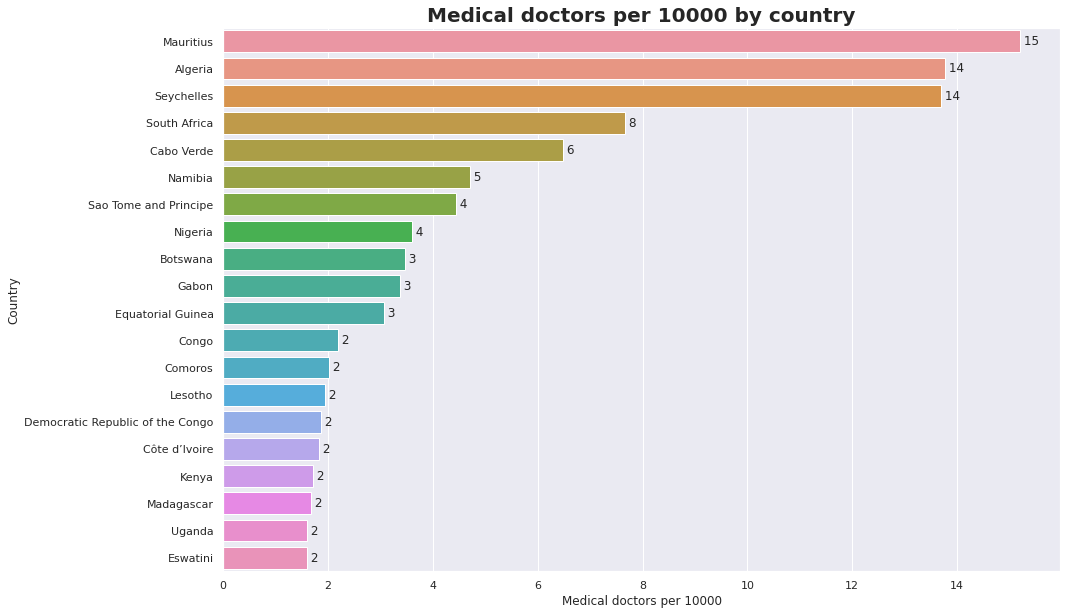

In [43]:
plt.figure(figsize=(15,10))
ax = sns.barplot(y='Location', x='FactValueNumeric', data=top_20_doctors_per_10000)
add_labels(list(top_20_doctors_per_10000['FactValueNumeric']))
plt.xlabel('Medical doctors per 10000')
plt.ylabel('Country')
plt.title("Medical doctors per 10000 by country", fontsize=20, fontweight='bold')
plt.savefig('medicaldoctorsper10000.png', bbox_inches='tight', dpi=300)
plt.show()

In [44]:
nigeria_medical_doctors = africa_medical_doctors[africa_medical_doctors['Location']=='Nigeria']
nigeria_medical_doctors

,IndicatorCode,Indicator,ParentLocationCode,ParentLocation,ThreeLocCode,Location,Period,FactValueNumeric,Value
291,HWF_0001,"Medical doctors (per 10,000)",AFR,Africa,NGA,Nigeria,2018,3.81,3.81
292,HWF_0001,"Medical doctors (per 10,000)",AFR,Africa,NGA,Nigeria,2016,4.49,4.49
293,HWF_0001,"Medical doctors (per 10,000)",AFR,Africa,NGA,Nigeria,2013,3.83,3.83
294,HWF_0001,"Medical doctors (per 10,000)",AFR,Africa,NGA,Nigeria,2009,3.78,3.78
295,HWF_0001,"Medical doctors (per 10,000)",AFR,Africa,NGA,Nigeria,2008,3.76,3.76
296,HWF_0001,"Medical doctors (per 10,000)",AFR,Africa,NGA,Nigeria,2007,3.78,3.78
297,HWF_0001,"Medical doctors (per 10,000)",AFR,Africa,NGA,Nigeria,2006,3.48,3.48
298,HWF_0001,"Medical doctors (per 10,000)",AFR,Africa,NGA,Nigeria,2005,2.82,2.82
299,HWF_0001,"Medical doctors (per 10,000)",AFR,Africa,NGA,Nigeria,2003,2.65,2.65
3135,HWF_0002,Medical doctors (number),AFR,Africa,NGA,Nigeria,2018,74543.00,74 543


In [45]:
nigeria_doctors = nigeria_medical_doctors[nigeria_medical_doctors['IndicatorCode']=='HWF_0002']

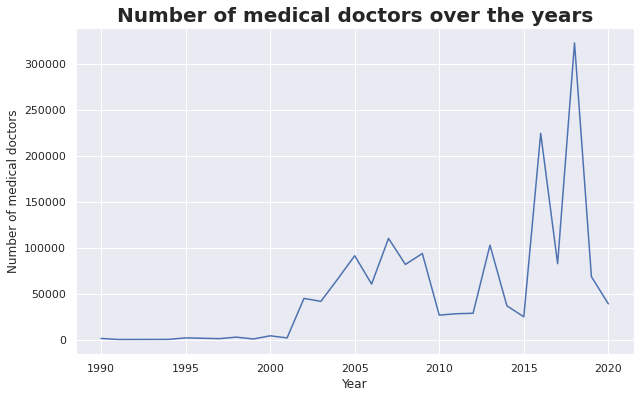

In [46]:
plt.figure(figsize=(10,6))
plt.plot(medical_doctors_per_year['Period'], medical_doctors_per_year['FactValueNumeric'])
plt.xlabel('Year')
plt.ylabel('Number of medical doctors')
plt.title('Number of medical doctors over the years',fontsize=20, fontweight='bold')
plt.savefig('no.ofmedicaldoctors.png', bbox_inches='tight', dpi=300)
plt.show()

In [47]:
population = pd.read_csv('/content/drive/MyDrive/Datasets/Hackathon/5. World Population.csv')
population.head()

,Entity,Code,Year,Population (historical estimates)
0,Afghanistan,AFG,-10000,14737
1,Afghanistan,AFG,-9000,20405
2,Afghanistan,AFG,-8000,28253
3,Afghanistan,AFG,-7000,39120
4,Afghanistan,AFG,-6000,54166


In [48]:
africa_population = population[population['Code'].isin(africa_countries)]
africa_population

,Entity,Code,Year,Population (historical estimates)
777,Algeria,DZA,-10000,12090
778,Algeria,DZA,-9000,20150
779,Algeria,DZA,-8000,33583
780,Algeria,DZA,-7000,55973
781,Algeria,DZA,-6000,93289
...,...,...,...,...
56908,Zimbabwe,ZWE,2017,14751101
56909,Zimbabwe,ZWE,2018,15052191
56910,Zimbabwe,ZWE,2019,15354606
56911,Zimbabwe,ZWE,2020,15669663


In [49]:
africa_population = africa_population[africa_population['Year']>=1990]
africa_population

,Entity,Code,Year,Population (historical estimates)
1004,Algeria,DZA,1990,25518074
1005,Algeria,DZA,1991,26133906
1006,Algeria,DZA,1992,26748302
1007,Algeria,DZA,1993,27354326
1008,Algeria,DZA,1994,27937006
...,...,...,...,...
56908,Zimbabwe,ZWE,2017,14751101
56909,Zimbabwe,ZWE,2018,15052191
56910,Zimbabwe,ZWE,2019,15354606
56911,Zimbabwe,ZWE,2020,15669663


In [50]:
africa_population_by_year = africa_population.groupby('Year', as_index=False)[['Population (historical estimates)']].sum()
africa_population_by_year

,Year,Population (historical estimates)
0,1990,638157571
1,1991,655040869
2,1992,671931834
3,1993,689140286
4,1994,706488557
5,1995,724331972
6,1996,742765067
7,1997,761224818
8,1998,779908311
9,1999,799099611


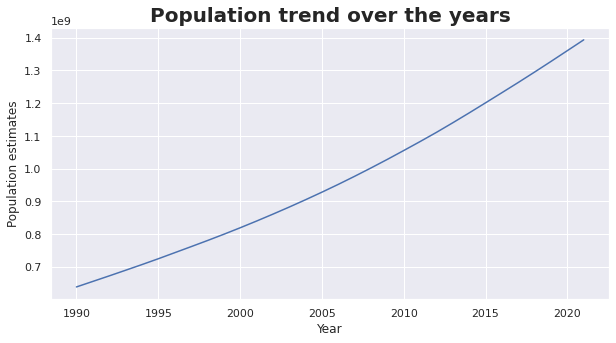

In [51]:
plt.figure(figsize=(10,5))
plt.plot(africa_population_by_year['Year'], africa_population_by_year['Population (historical estimates)'])
plt.xlabel('Year')
plt.ylabel('Population estimates')
plt.title('Population trend over the years', fontsize=20, fontweight='bold')
plt.savefig('populationtrend.png', bbox_inches='tight', dpi=300)
plt.show()

In [52]:
gdp = pd.read_excel('/content/drive/MyDrive/Datasets/Hackathon/6. Current health expenditure (% of GDP).xlsx', skiprows=4)
gdp

,Country Name,Country Code,Indicator Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,Current health expenditure (% of GDP),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,Current health expenditure (% of GDP),6.252428,6.390627,5.969416,6.635666,6.710734,6.528098,6.492506,6.468483,6.299643,6.881512,6.922891,6.773979,6.562794,6.565689,6.152063,6.482263,6.390654,6.317654,6.286829,6.266386,NaN,NaN
2,Afghanistan,AFG,Current health expenditure (% of GDP),NaN,NaN,9.443390,8.941258,9.808474,9.948290,10.622766,9.904675,10.256495,9.818487,8.569672,8.561907,7.897176,8.805941,9.528871,10.105348,11.818562,12.620817,14.126743,13.242202,NaN,NaN
3,Africa Western and Central,AFW,Current health expenditure (% of GDP),3.771302,3.770256,3.387634,4.681099,4.481882,4.277262,4.139578,3.908460,3.731591,3.786792,3.521739,3.550677,3.505065,3.621925,3.614749,3.834676,3.811248,3.789624,3.393160,3.366100,NaN,NaN
4,Angola,AGO,Current health expenditure (% of GDP),1.908599,4.483516,3.329461,3.547973,3.967201,2.852197,2.685537,2.974388,3.322905,3.842609,2.695100,2.645608,2.395750,2.732828,2.434129,2.605795,2.713149,2.791503,2.540102,2.533360,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,Current health expenditure (% of GDP),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,"Yemen, Rep.",YEM,Current health expenditure (% of GDP),4.666065,4.945151,4.832372,5.757578,5.514405,5.205854,5.529299,5.820770,5.761911,5.986204,5.159331,4.769531,5.195936,4.960832,4.841805,4.252858,NaN,NaN,NaN,NaN,NaN,NaN
263,South Africa,ZAF,Current health expenditure (% of GDP),8.164721,7.939017,7.464463,7.915304,7.764534,7.689974,7.692216,7.681384,7.880248,8.523502,8.665970,8.741462,8.773108,8.855524,8.550915,8.790190,8.821429,8.722624,8.858297,9.109355,NaN,NaN
264,Zambia,ZMB,Current health expenditure (% of GDP),7.152371,6.552485,6.794035,7.189994,7.049950,6.863322,5.873673,4.352650,4.012075,4.426805,3.719296,3.460532,3.930529,4.690910,3.829242,4.435102,4.477207,4.376977,5.032715,5.312203,NaN,NaN


In [53]:
africa_gdp = gdp[gdp['Country Code'].isin(africa_countries)]
africa_gdp

,Country Name,Country Code,Indicator Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
4,Angola,AGO,Current health expenditure (% of GDP),1.908599,4.483516,3.329461,3.547973,3.967201,2.852197,2.685537,2.974388,3.322905,3.842609,2.695100,2.645608,2.395750,2.732828,2.434129,2.605795,2.713149,2.791503,2.540102,2.533360,NaN,NaN
16,Burundi,BDI,Current health expenditure (% of GDP),6.176971,6.404844,6.472161,6.313277,7.701042,8.423713,9.942323,10.580819,9.235422,10.350219,11.276376,10.069978,8.526685,8.537285,7.315492,6.428827,7.719209,7.903018,8.244769,7.990914,NaN,NaN
18,Benin,BEN,Current health expenditure (% of GDP),3.102703,3.249100,3.043354,3.037654,3.076057,2.934783,2.973310,2.893824,2.696751,2.825283,2.997104,3.096283,3.414499,2.858612,2.667438,2.907417,2.739500,2.619109,2.504164,2.388429,NaN,NaN
19,Burkina Faso,BFA,Current health expenditure (% of GDP),2.950264,2.888354,2.971133,3.143072,4.217214,3.951091,4.514462,5.233729,4.647808,5.081593,5.239585,4.648684,4.602670,5.563312,5.000269,5.131925,5.959631,6.029408,4.909887,5.464942,NaN,NaN
33,Botswana,BWA,Current health expenditure (% of GDP),5.827264,6.156716,6.421541,6.176169,5.795304,5.025351,4.773733,5.333117,5.782003,6.525008,6.194025,5.776903,6.141460,6.224388,5.597931,5.726299,5.560522,6.134534,5.968672,6.048366,NaN,NaN
34,Central African Republic,CAF,Current health expenditure (% of GDP),4.274785,3.955942,4.227613,4.397202,4.304423,4.367321,4.441054,4.718515,4.086991,4.819011,3.827040,3.873770,3.940204,4.951625,4.916602,5.034352,5.444003,6.665438,10.995310,7.753009,NaN,NaN
41,Cote d'Ivoire,CIV,Current health expenditure (% of GDP),6.126845,6.017727,5.903909,5.479770,5.475208,5.006430,4.763305,4.552536,4.568734,4.469702,4.415810,4.397042,4.427406,3.717768,3.731048,3.219909,3.351723,3.305099,3.118911,3.298630,NaN,NaN
42,Cameroon,CMR,Current health expenditure (% of GDP),4.297622,4.097513,4.294797,4.268264,4.015150,4.095445,4.028973,3.959409,3.822916,3.739336,3.758915,4.016860,4.073135,3.784994,3.951177,3.748792,3.729508,3.492165,3.465106,3.595395,NaN,NaN
43,"Congo, Dem. Rep.",COD,Current health expenditure (% of GDP),1.550400,2.707750,2.654775,3.818179,4.420290,4.252656,4.393809,4.335552,4.988719,4.546159,3.860356,3.262672,3.300994,3.566633,3.978740,3.969213,4.366031,4.156466,3.302493,3.536261,NaN,NaN
44,"Congo, Rep.",COG,Current health expenditure (% of GDP),1.505006,2.185297,1.701677,1.918522,1.921524,1.717741,1.708613,1.902001,2.239270,2.142220,1.851729,1.752373,1.909710,1.943470,1.973117,2.456685,2.790675,2.518127,1.936492,2.083311,NaN,NaN


In [54]:
africa_gdp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54 entries, 4 to 265
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    54 non-null     object 
 1   Country Code    54 non-null     object 
 2   Indicator Name  54 non-null     object 
 3   2000            51 non-null     float64
 4   2001            51 non-null     float64
 5   2002            51 non-null     float64
 6   2003            51 non-null     float64
 7   2004            51 non-null     float64
 8   2005            51 non-null     float64
 9   2006            51 non-null     float64
 10  2007            51 non-null     float64
 11  2008            51 non-null     float64
 12  2009            51 non-null     float64
 13  2010            52 non-null     float64
 14  2011            52 non-null     float64
 15  2012            51 non-null     float64
 16  2013            51 non-null     float64
 17  2014            51 non-null     floa

In [55]:
africa_gdp.head()

,Country Name,Country Code,Indicator Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
4,Angola,AGO,Current health expenditure (% of GDP),1.908599,4.483516,3.329461,3.547973,3.967201,2.852197,2.685537,2.974388,3.322905,3.842609,2.695100,2.645608,2.395750,2.732828,2.434129,2.605795,2.713149,2.791503,2.540102,2.533360,NaN,NaN
16,Burundi,BDI,Current health expenditure (% of GDP),6.176971,6.404844,6.472161,6.313277,7.701042,8.423713,9.942323,10.580819,9.235422,10.350219,11.276376,10.069978,8.526685,8.537285,7.315492,6.428827,7.719209,7.903018,8.244769,7.990914,NaN,NaN
18,Benin,BEN,Current health expenditure (% of GDP),3.102703,3.249100,3.043354,3.037654,3.076057,2.934783,2.973310,2.893824,2.696751,2.825283,2.997104,3.096283,3.414499,2.858612,2.667438,2.907417,2.739500,2.619109,2.504164,2.388429,NaN,NaN
19,Burkina Faso,BFA,Current health expenditure (% of GDP),2.950264,2.888354,2.971133,3.143072,4.217214,3.951091,4.514462,5.233729,4.647808,5.081593,5.239585,4.648684,4.602670,5.563312,5.000269,5.131925,5.959631,6.029408,4.909887,5.464942,NaN,NaN
33,Botswana,BWA,Current health expenditure (% of GDP),5.827264,6.156716,6.421541,6.176169,5.795304,5.025351,4.773733,5.333117,5.782003,6.525008,6.194025,5.776903,6.141460,6.224388,5.597931,5.726299,5.560522,6.134534,5.968672,6.048366,NaN,NaN


In [56]:
africa_gdp['Indicator Name'].value_counts()

Current health expenditure (% of GDP)    54
Name: Indicator Name, dtype: int64

In [57]:
africa_gdp = africa_gdp.fillna(0)

In [58]:
africa_gdp.isna().sum()

Country Name      0
Country Code      0
Indicator Name    0
2000              0
2001              0
2002              0
2003              0
2004              0
2005              0
2006              0
2007              0
2008              0
2009              0
2010              0
2011              0
2012              0
2013              0
2014              0
2015              0
2016              0
2017              0
2018              0
2019              0
2020              0
2021              0
dtype: int64

In [59]:
years = [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2009, 2010,
         2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]


In [60]:
sum_list = []
for i in years:
  sums = africa_gdp[i].mean()
  sum_list.append(sums)
sum_list

[4.399689570740741,
 4.533039124074073,
 4.637873950370371,
 4.839131935925926,
 5.027020297407407,
 4.964921755000001,
 4.957623011296296,
 4.973336771481481,
 5.106496393518518,
 5.175697126296298,
 5.194003724999999,
 4.942692079444446,
 5.119290035925927,
 5.250588592962963,
 5.299631893518518,
 5.254608573703704,
 5.255119347777777,
 5.2056388855555555,
 5.07635645611111]

In [61]:
gdp_years = list(zip(years, sum_list))

In [62]:
gdp_per_year = pd.DataFrame(gdp_years, columns=['Year', '% of GDP'])
gdp_per_year

,Year,% of GDP
0,2000,4.399690
1,2001,4.533039
2,2002,4.637874
3,2003,4.839132
4,2004,5.027020
5,2005,4.964922
6,2006,4.957623
7,2007,4.973337
8,2009,5.106496
9,2010,5.175697


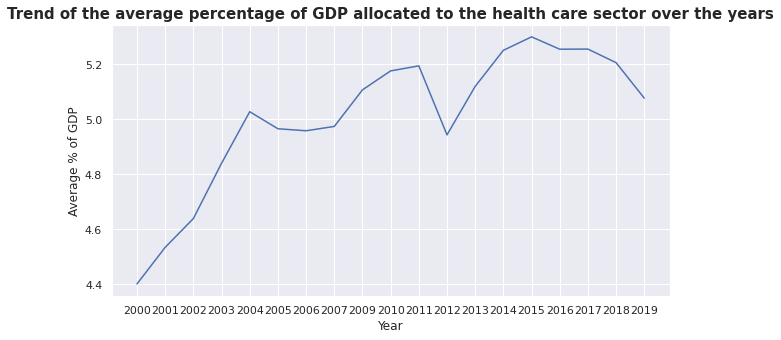

In [63]:
plt.figure(figsize=(10,5))
xtick = range(len(gdp_per_year['Year']))
plt.plot(xtick, gdp_per_year['% of GDP'])
plt.xticks(xtick, gdp_per_year['Year'])
plt.xlabel('Year')
plt.ylabel('Average % of GDP')
plt.title('Trend of the average percentage of GDP allocated to the health care sector over the years', fontsize=15, fontweight='bold')
plt.savefig('%ofgdp.png', dpi=300, bbox_inches='tight')
plt.show()